In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Description :
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

| Variable | Description|
| :------- | :------: | 
| Hours Studied | The total number of hours spent studying by each student. | 
| Previous Scores | The scores obtained by students in previous tests. | 
| Extracurricular Activities | Whether the student participates in extracurricular activities (Yes or No) |
| Sleep Hours | The average number of hours of sleep the student had per day. |
| Sample Question Papers Practiced | The number of sample question papers the student practiced. |

#### Target Variable:
Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [4]:
data = pd.read_csv('Student_Performance.csv')

In [5]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [10]:
#data.isnull().sum()[data.isnull().sum()>0
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [12]:
# OneHotEncoding - Change the categorical variable 'Extracurricular' to numerical variable
data = pd.get_dummies(data, drop_first=True, dtype=int)
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


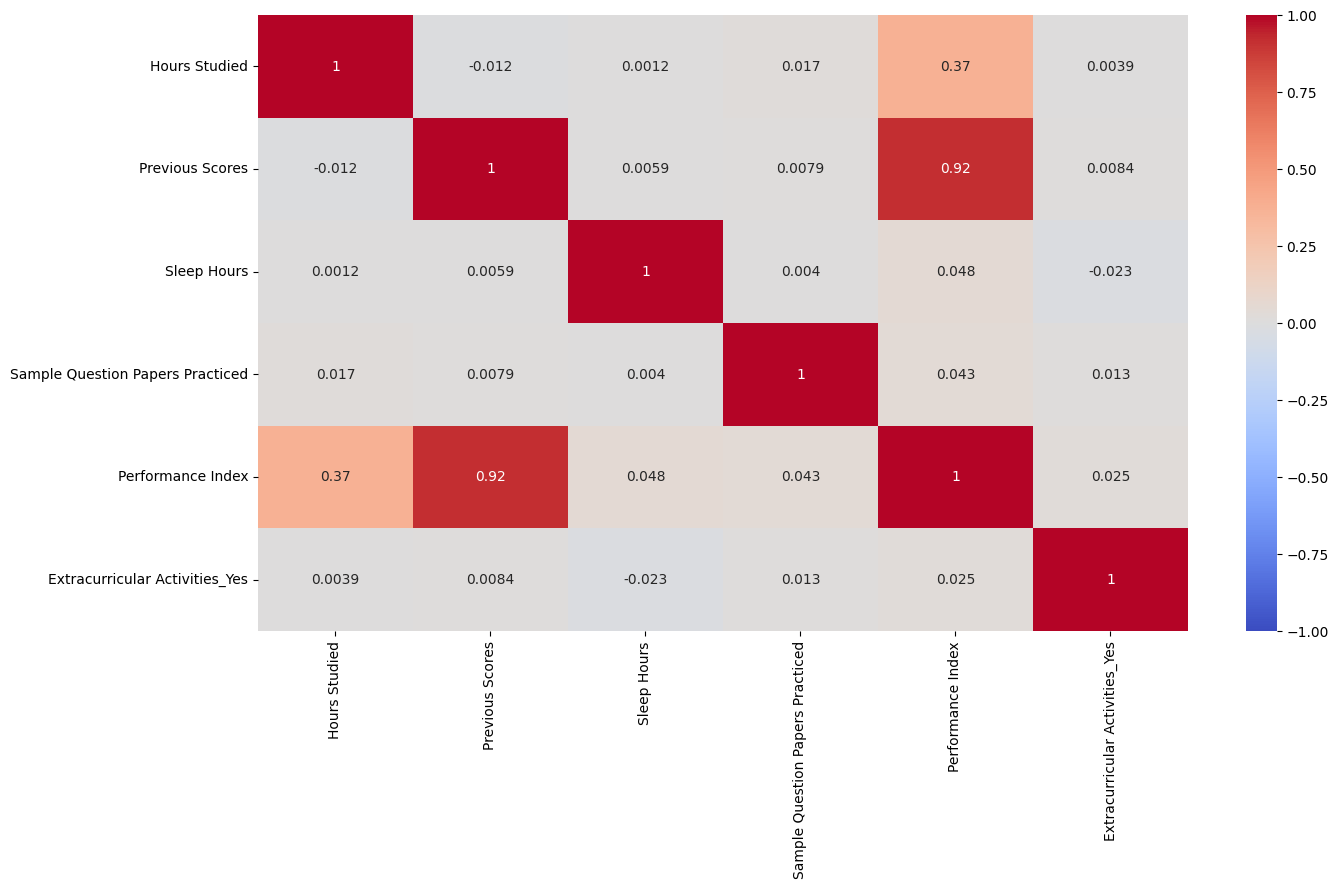

In [13]:
#To understand the co-linearity let us create heatmap
plt.figure(figsize=(15, 8))
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

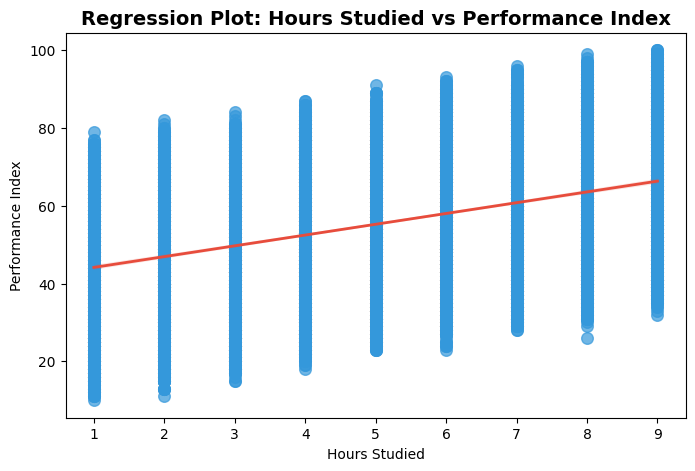

In [14]:
#performance index vs hours studied
plt.figure(figsize=(8, 5))
sns.regplot(
    data=data,
    x='Hours Studied',
    y='Performance Index',
    scatter_kws={'color':'#3498db', 'alpha':0.7, 's':70},
    line_kws={'color':'#e74c3c', 'lw':2}
)
plt.title("Regression Plot: Hours Studied vs Performance Index", fontsize=14, weight='bold')
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.show()

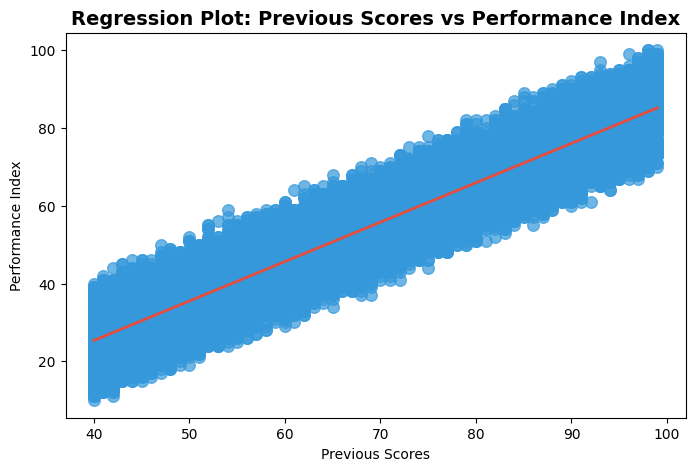

In [15]:
#performance index vs Previous Scores
plt.figure(figsize=(8, 5))
sns.regplot(
    data=data,
    x='Previous Scores',
    y='Performance Index',
    scatter_kws={'color':'#3498db', 'alpha':0.7, 's':70},
    line_kws={'color':'#e74c3c', 'lw':2}
)
plt.title("Regression Plot: Previous Scores vs Performance Index", fontsize=14, weight='bold')
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.show()

In [16]:
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


In [18]:
X = data.drop(columns=["Performance Index"]) # all indepedent variables
y = data["Performance Index"] # dependent variable

# Split the dataset
X_train,X_test,y_train,y_test= train_test_split(X,
                           y,
                           random_state=42,
                           test_size=0.1)

In [19]:
X_train.shape

(9000, 5)

In [20]:
# Train the model
MultiLinearModel = LinearRegression()
MultiLinearModel.fit(X_train, y_train)
print(MultiLinearModel.intercept_)
coefficients = pd.DataFrame({"Features": X.columns, "Coefficients": MultiLinearModel.coef_})
print(coefficients)

-33.952187437649556
                           Features  Coefficients
0                     Hours Studied      2.850629
1                   Previous Scores      1.017823
2                       Sleep Hours      0.474271
3  Sample Question Papers Practiced      0.190238
4    Extracurricular Activities_Yes      0.597034


In [21]:
# Predict the dependent variable
y_pred = MultiLinearModel.predict(X_test)

In [22]:
# Model evaluation stats
print(f"The R2 value of the model is {metrics.r2_score(y_test, y_pred)}")
print(f"The mean squared error is {metrics.mean_squared_error(y_test, y_pred)}")
print(f"The root mean squared error is {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"Mean absolute error {metrics.mean_absolute_error(y_test, y_pred)}")

The R2 value of the model is 0.9892386793406651
The mean squared error is 4.096440469458499
The root mean squared error is 2.023966518858081
Mean absolute error 1.6138321434327172


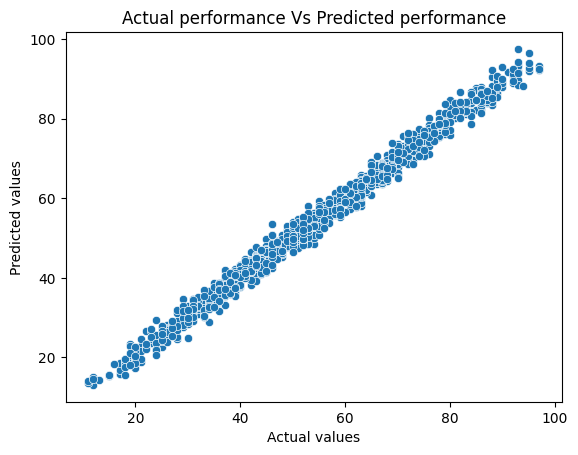

In [23]:
# Scatter plot to visualize the difference between actual values and the predicted values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual performance Vs Predicted performance")
plt.show()

In [24]:
X.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0


In [25]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [26]:
new_data =[[8, 95, 7, 4, 1]]

In [27]:
performance_index = MultiLinearModel.predict(new_data)
print(performance_index)

[90.22392886]


C:\Users\hp\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
print("coefficients: ", MultiLinearModel.coef_)
print("intercept: ", MultiLinearModel.intercept_)

coefficients:  [2.85062888 1.01782319 0.47427101 0.19023783 0.59703413]
intercept:  -33.952187437649556
